In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('winequalityN.csv')

In [4]:
# Check first five wines
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
pred_test = wine.iloc[3]

In [6]:
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide      47.0
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

In [7]:
# rows and columns
wine.shape

(6497, 13)

In [8]:
# Checking null in each column
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# One to remove na values is just by dropping them since they are very few
wine.dropna(inplace=True)
#another way is to impute let's say average value 
#wine.update(wine.fillna(wine.mean()))

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [12]:
# Wine counts between red and white, alternatively run value_counts(normalize=True) for percentage
wine['type'].value_counts()

type
white    4870
red      1593
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

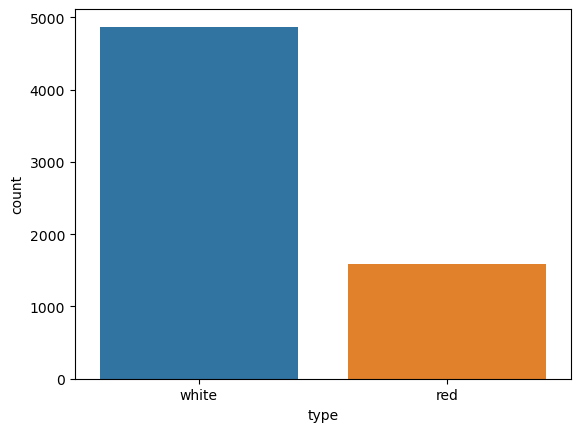

In [13]:
# Alternatively you can visualize the data as a graph using seaborn.
sns.countplot(x="type",data=wine)

In [14]:
wine['type'].value_counts(normalize=True)

type
white    0.75352
red      0.24648
Name: proportion, dtype: float64

<Axes: >

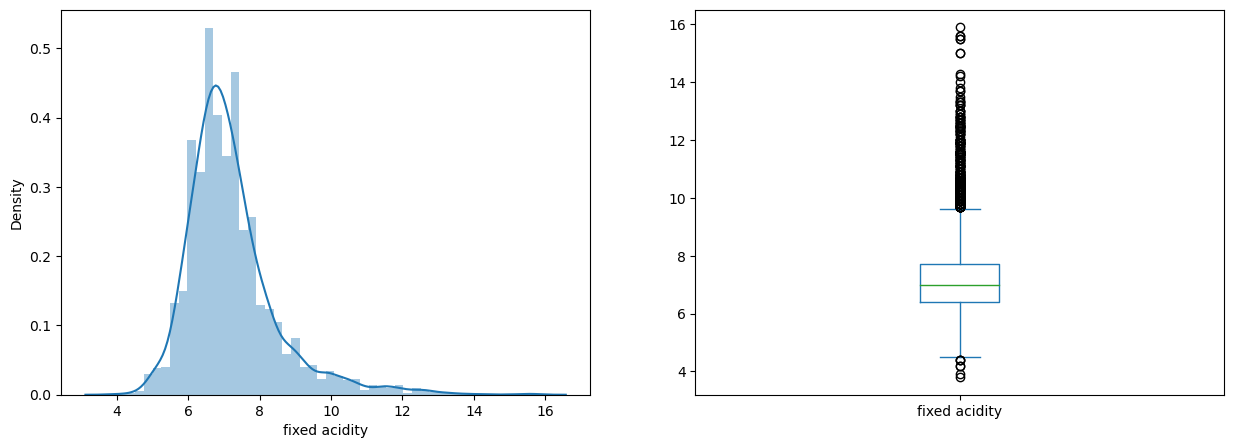

In [15]:
# Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['fixed acidity'])
plt.subplot(122)
wine['fixed acidity'].plot.box(figsize=(15,5))

<Axes: >

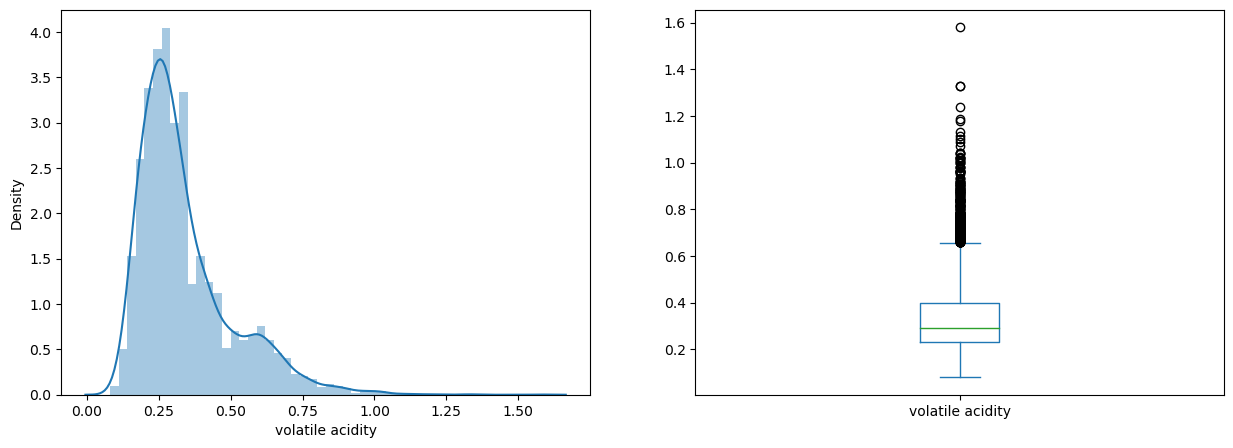

In [16]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['volatile acidity'])
plt.subplot(122)
wine['volatile acidity'].plot.box(figsize=(15,5))

<Axes: >

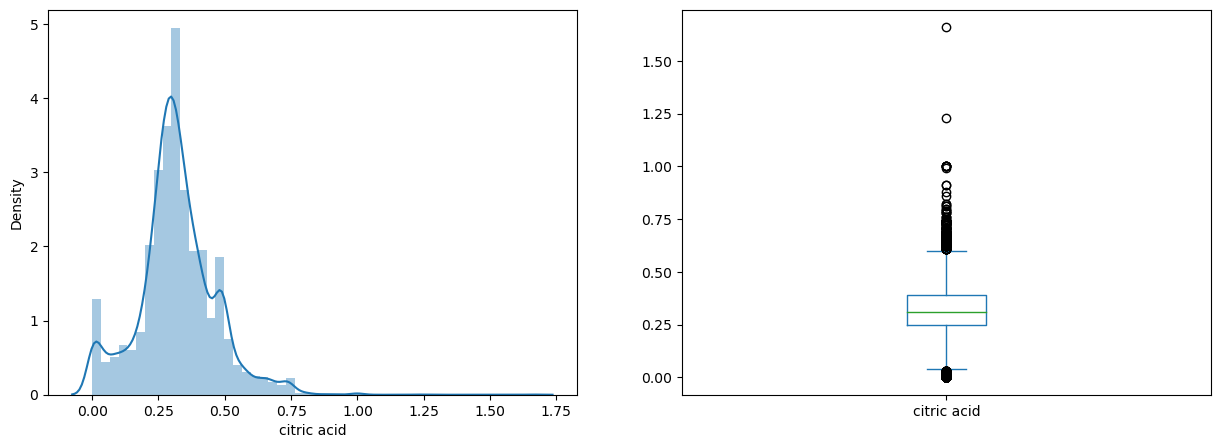

In [17]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['citric acid'])
plt.subplot(122)
wine['citric acid'].plot.box(figsize=(15,5))

<Axes: >

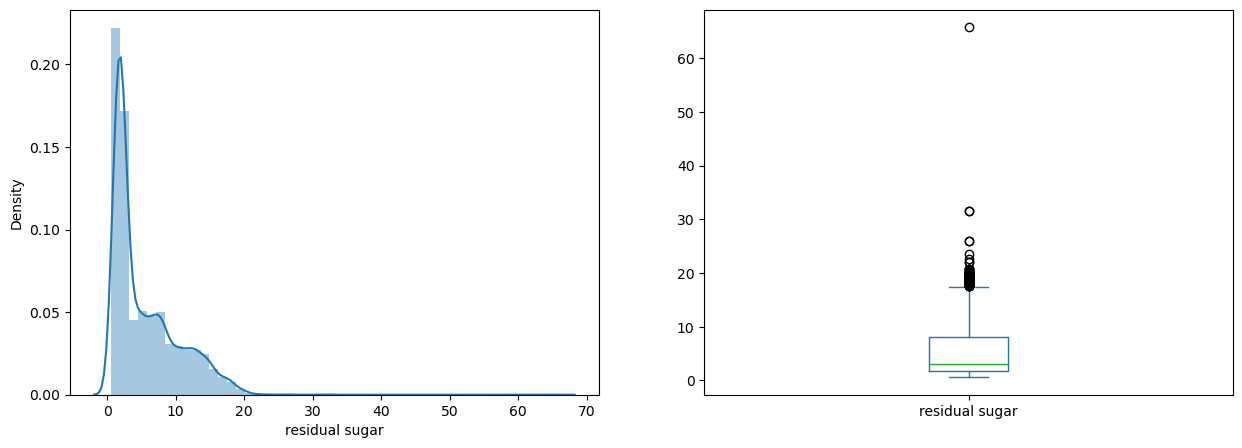

In [18]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['residual sugar'])
plt.subplot(122)
wine['residual sugar'].plot.box(figsize=(15,5))

<Axes: >

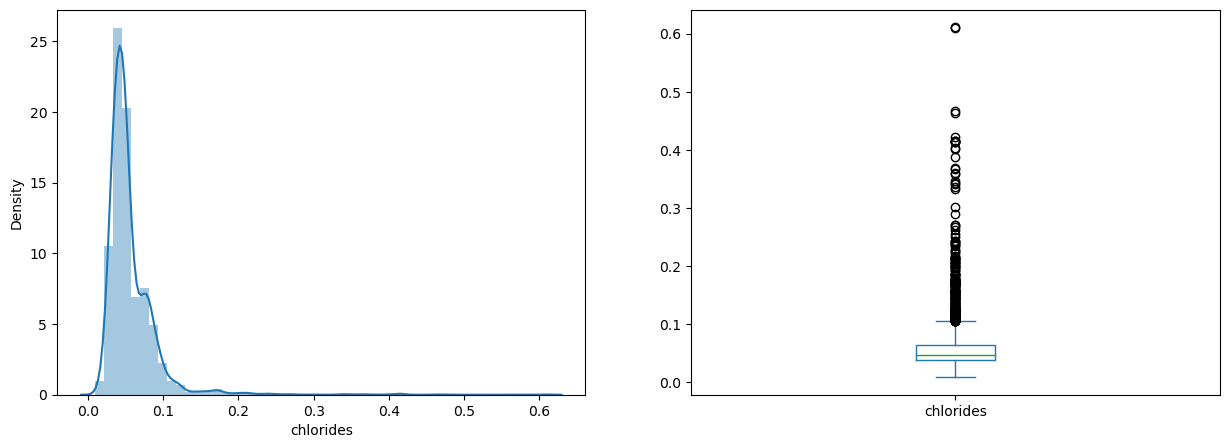

In [19]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['chlorides'])
plt.subplot(122)
wine['chlorides'].plot.box(figsize=(15,5))

<Axes: >

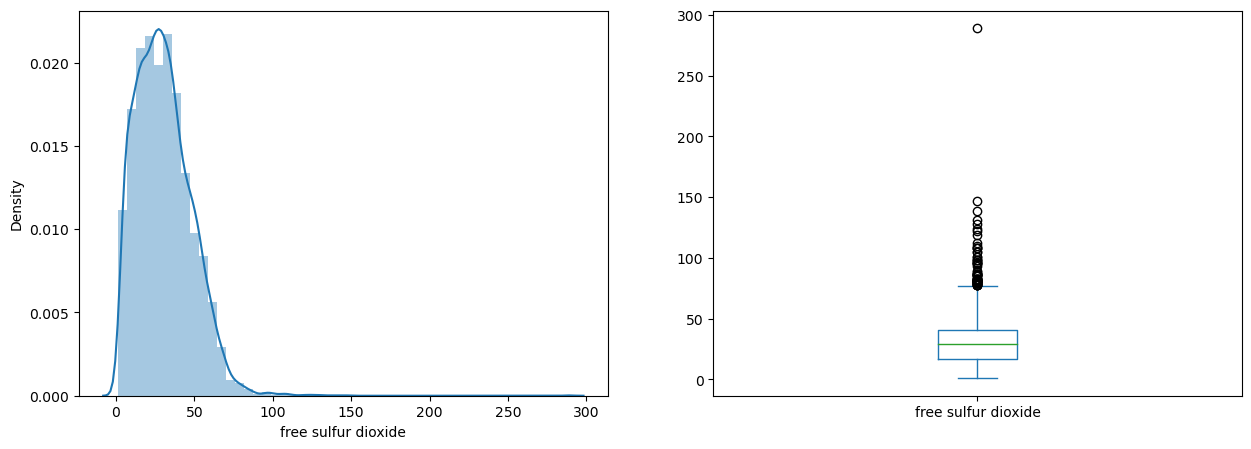

In [20]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['free sulfur dioxide'])
plt.subplot(122)
wine['free sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

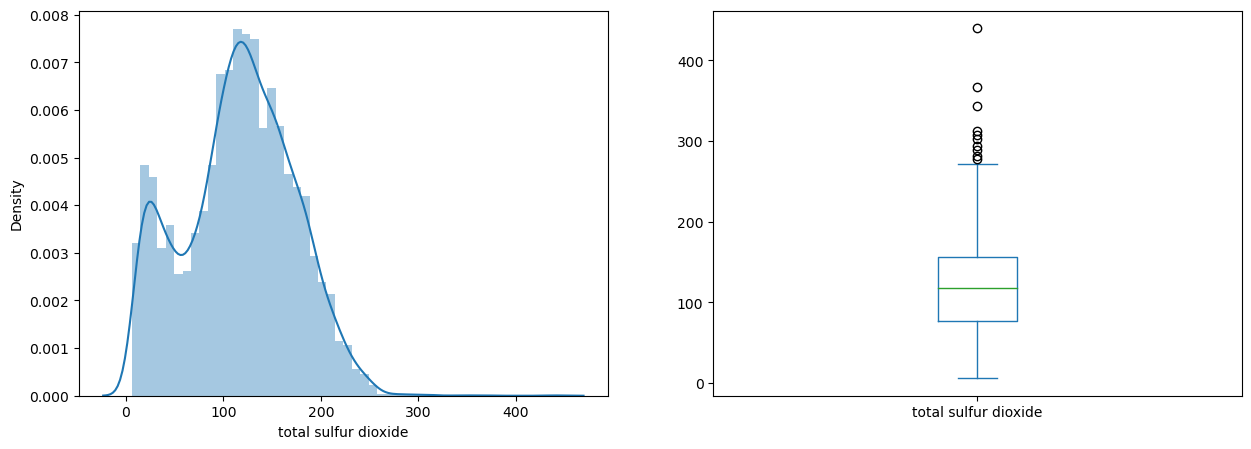

In [21]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['total sulfur dioxide'])
plt.subplot(122)
wine['total sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

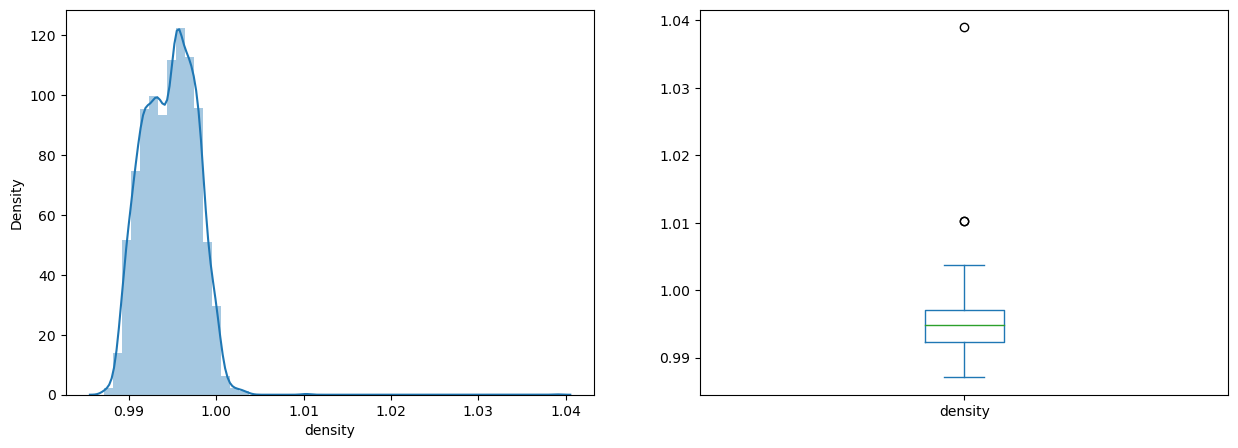

In [22]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['density'])
plt.subplot(122)
wine['density'].plot.box(figsize=(15,5))

<Axes: >

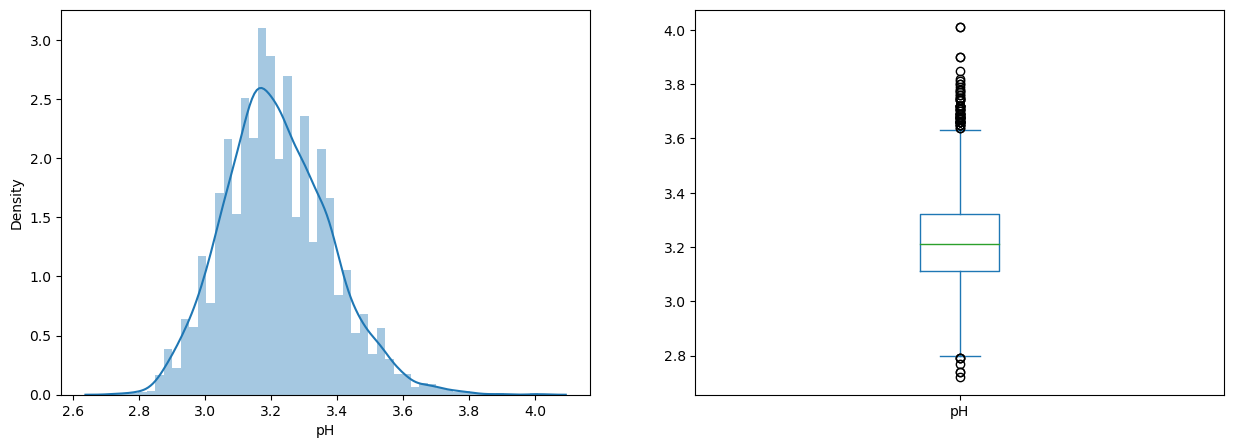

In [23]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['pH'])
plt.subplot(122)
wine['pH'].plot.box(figsize=(15,5))

<Axes: >

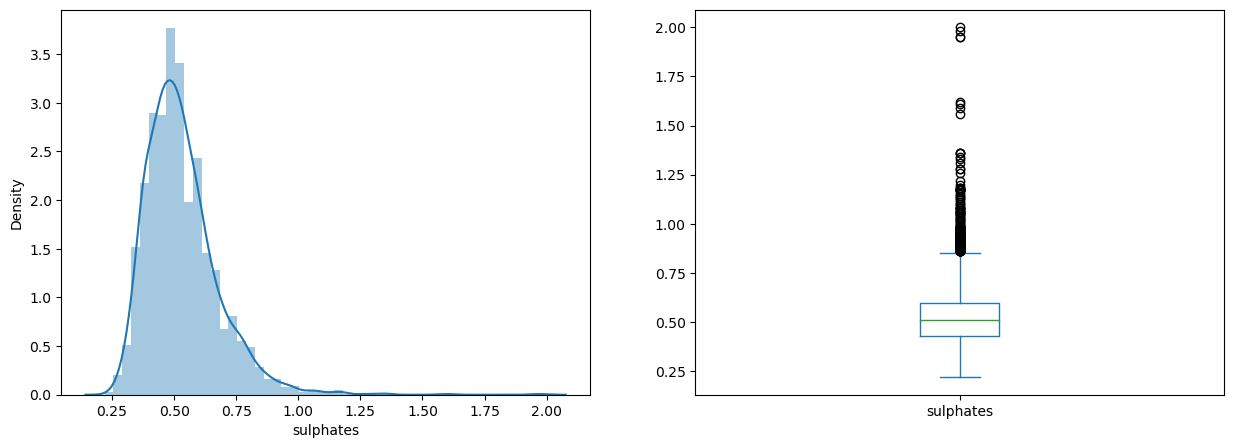

In [24]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['sulphates'])
plt.subplot(122)
wine['sulphates'].plot.box(figsize=(15,5))

<Axes: >

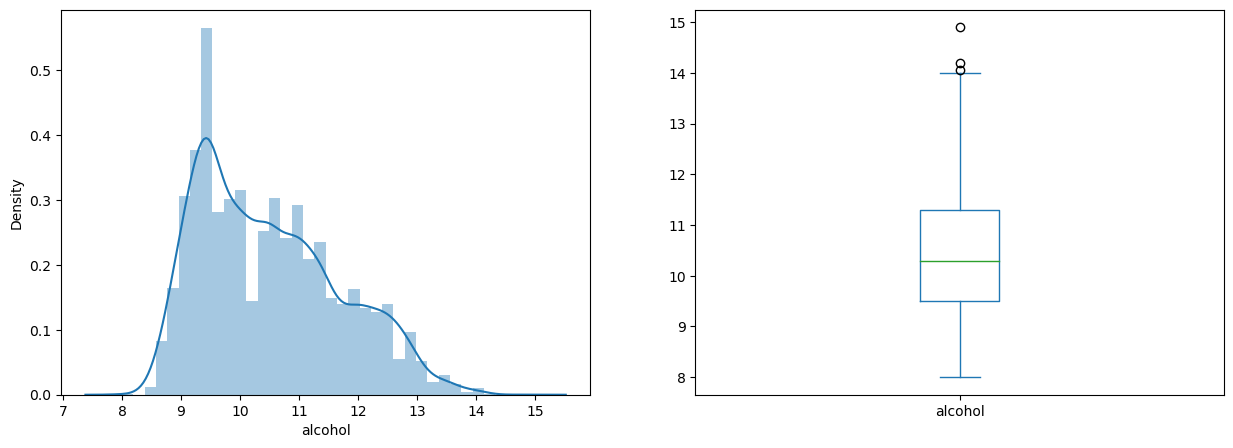

In [25]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))

<Axes: >

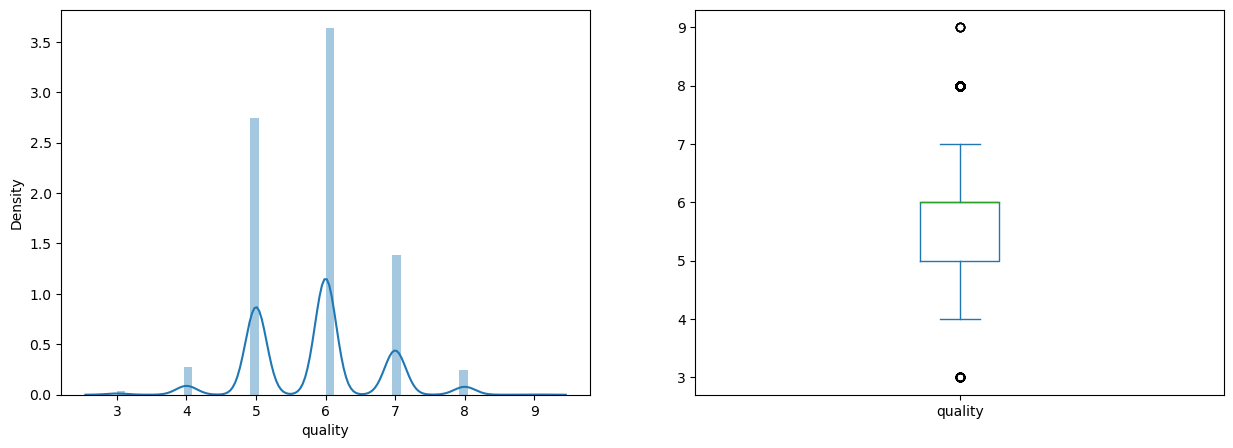

In [26]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['quality'])
plt.subplot(122)
wine['quality'].plot.box(figsize=(15,5))

<Axes: xlabel='quality', ylabel='fixed acidity'>

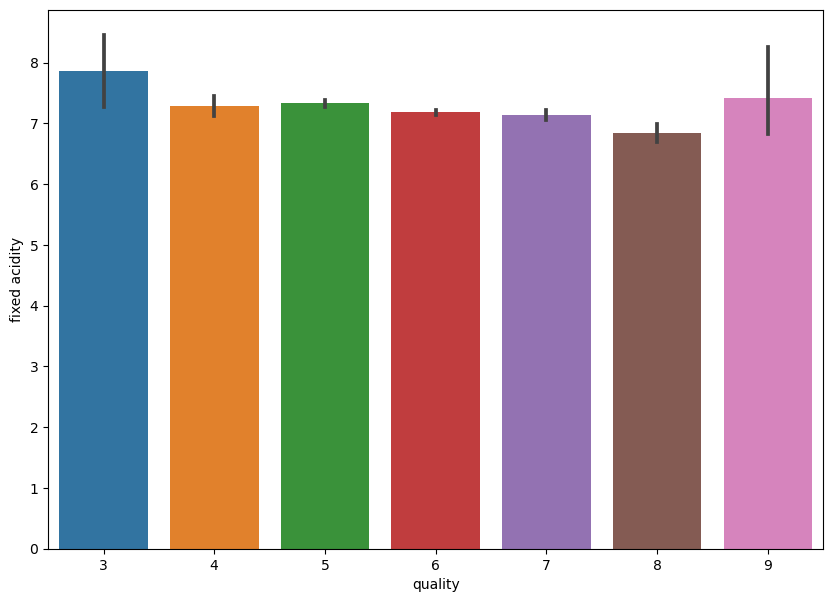

In [27]:
# Bivariate analysis to check quality with all the other variables to show how each variable is connected to quality.
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

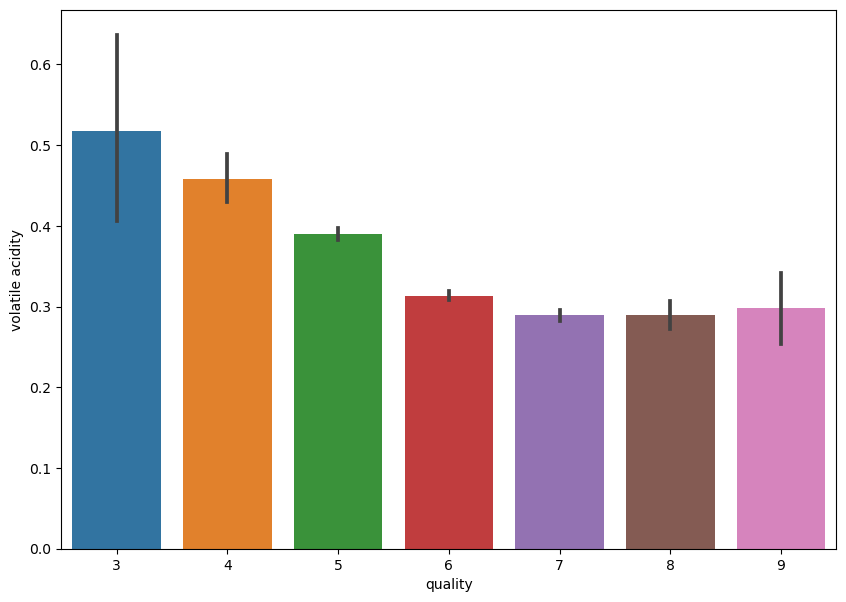

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

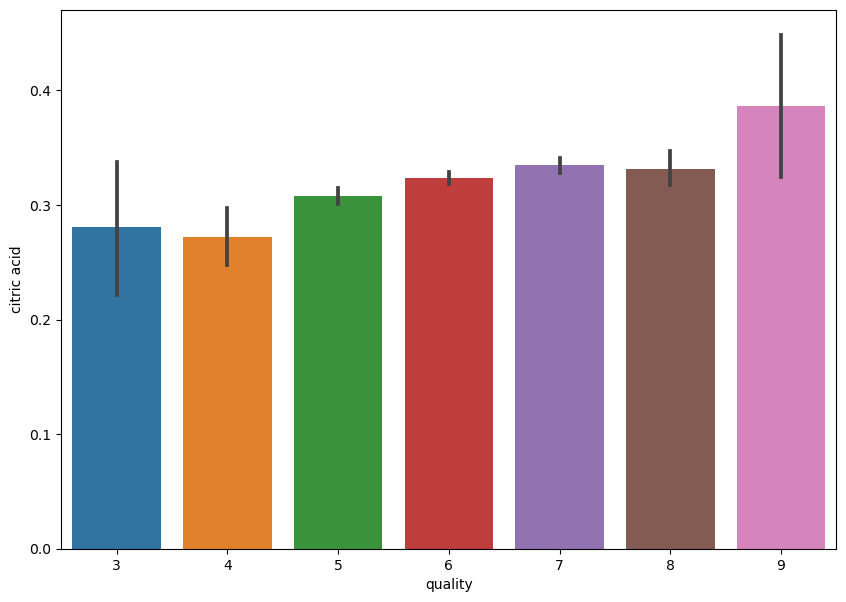

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='citric acid', data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

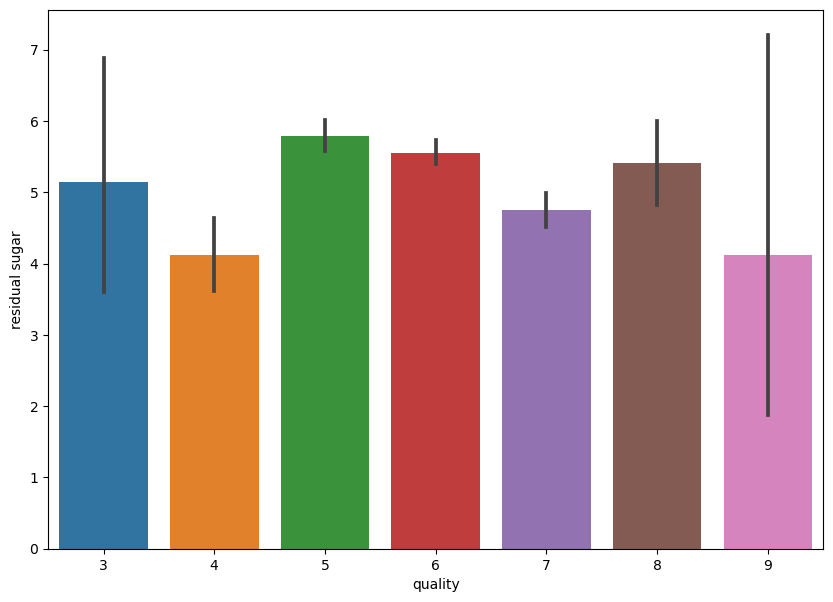

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

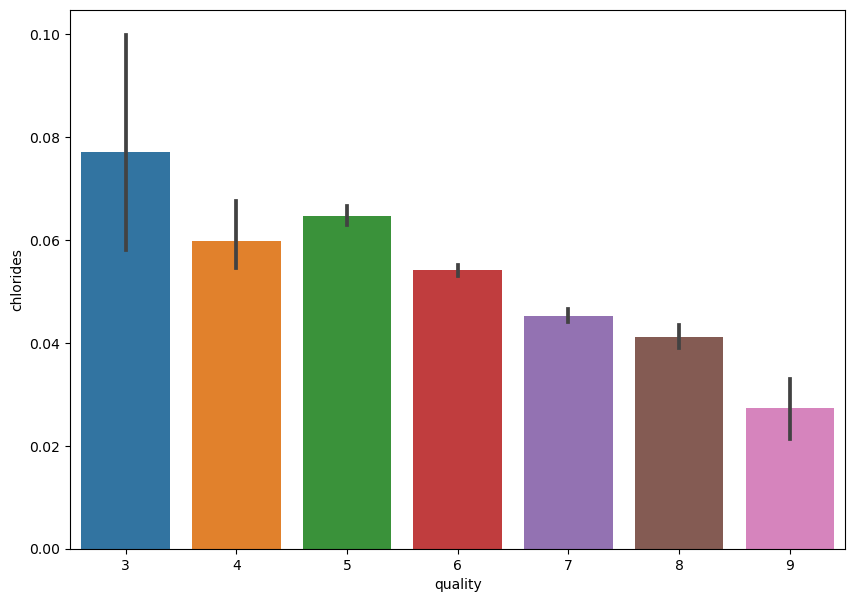

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='chlorides', data=wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

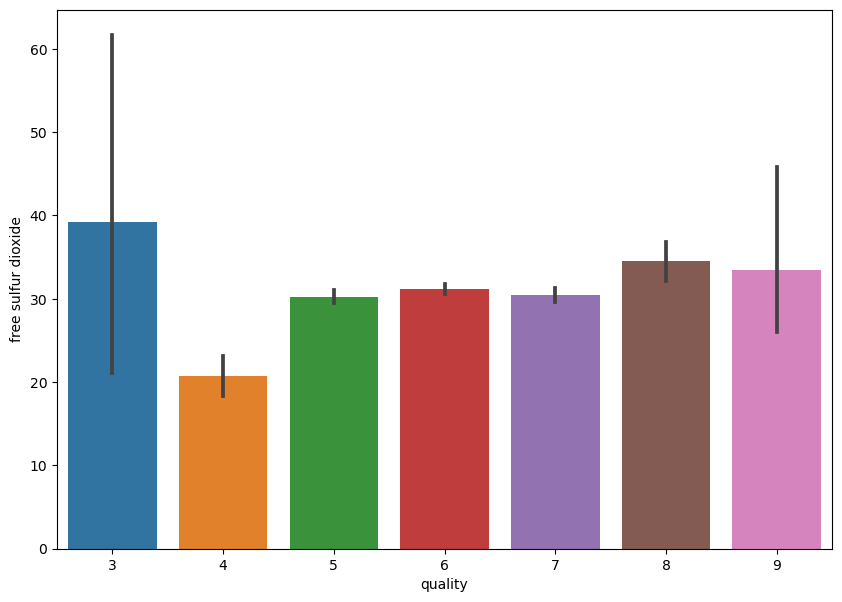

In [32]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

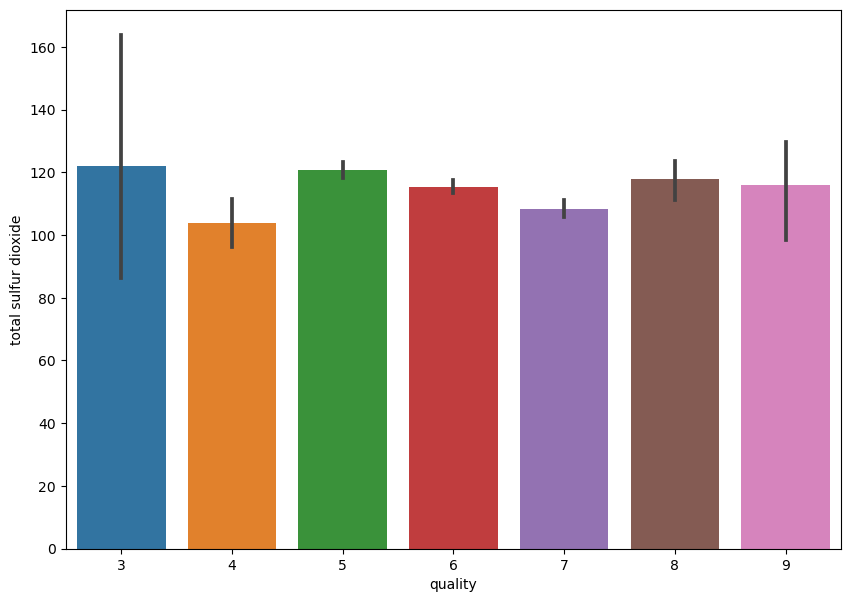

In [33]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='density'>

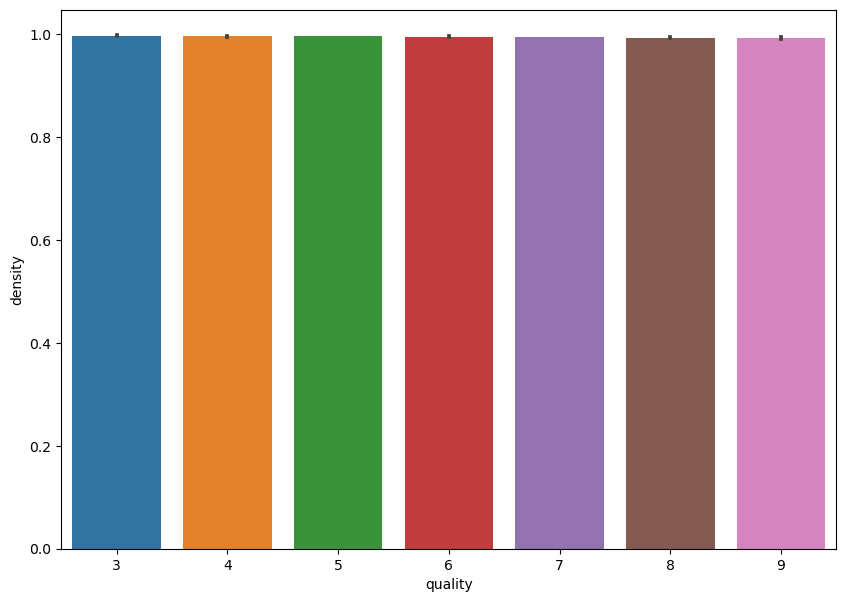

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='density', data=wine)

<Axes: xlabel='quality', ylabel='pH'>

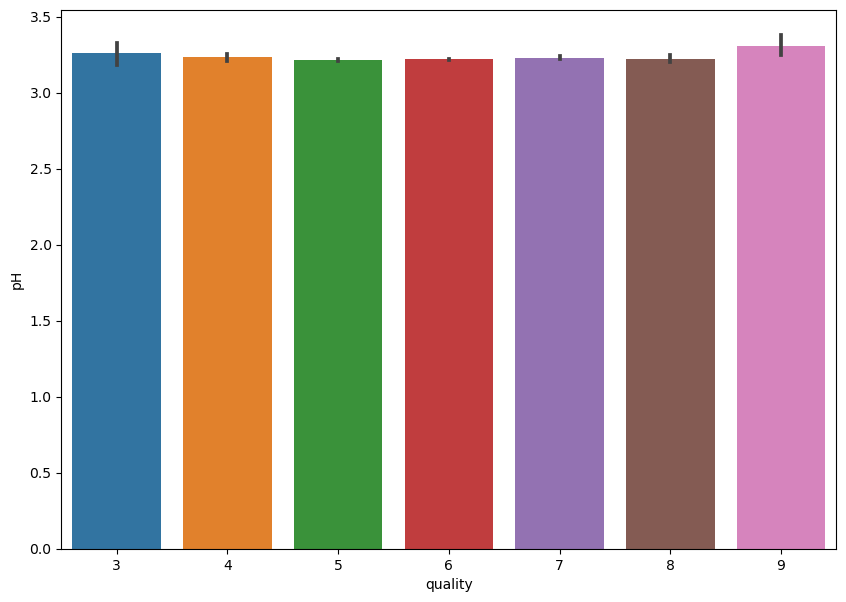

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='pH', data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

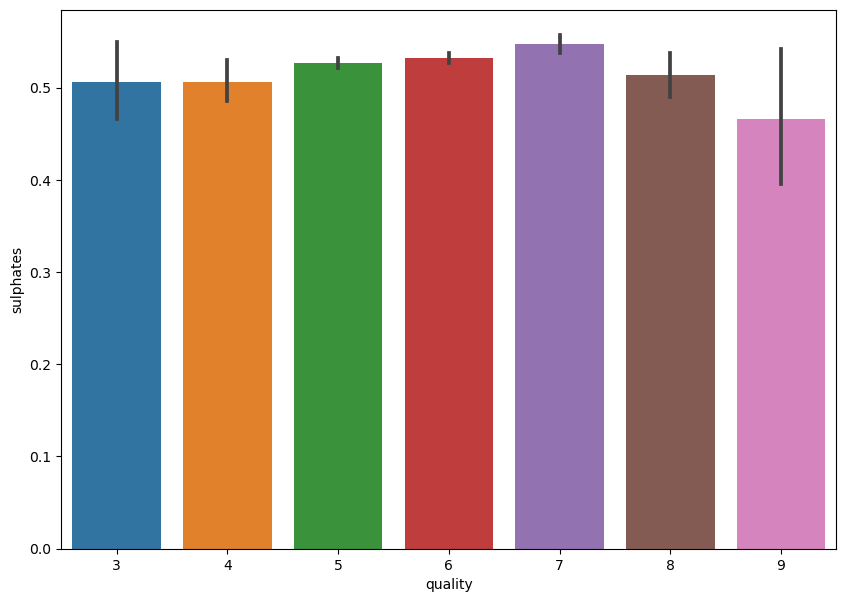

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='sulphates', data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

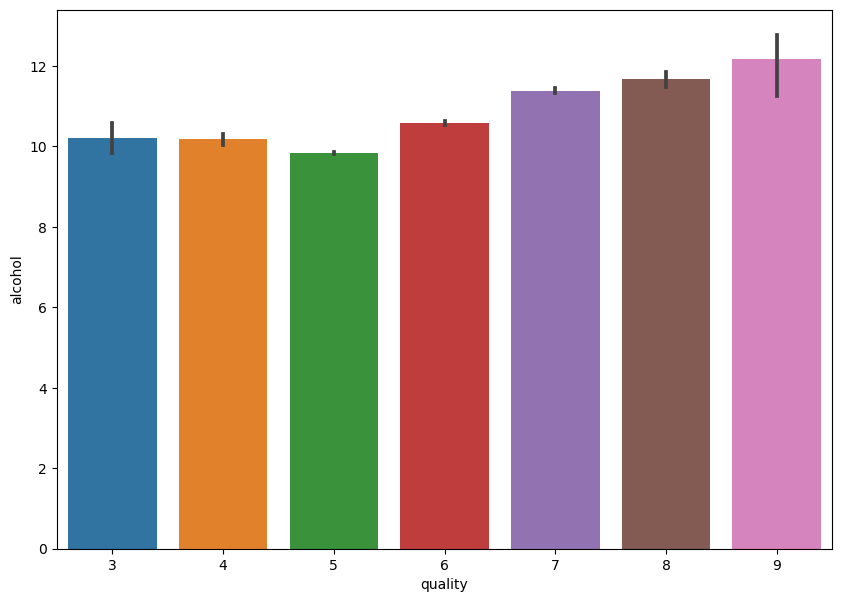

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='alcohol', data=wine)

<Axes: xlabel='quality', ylabel='quality'>

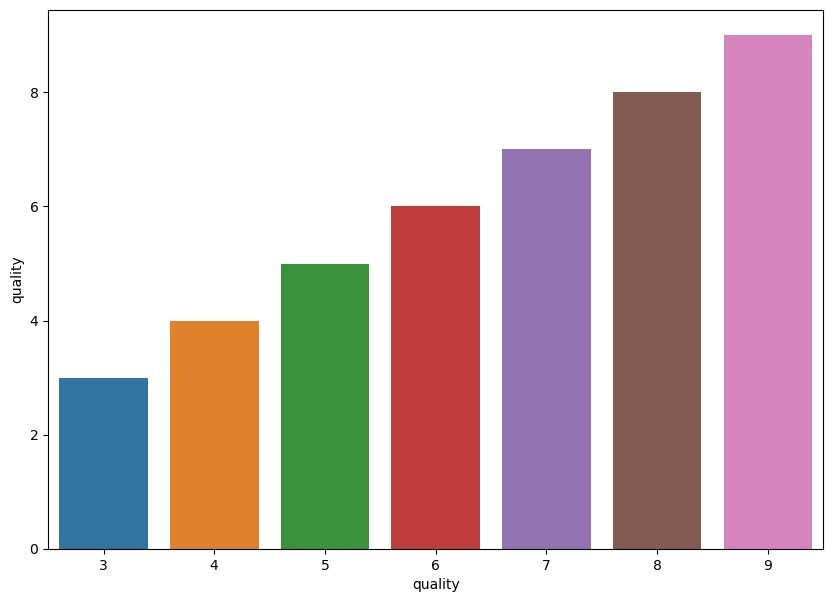

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='quality', data=wine)

In [ ]:
#Plotting all variables for their distribution and relation
sns.pairplot(wine)

In [ ]:
# Convert 'type' column to numeric (0 for red, 1 for white)
wine['type'] = wine['type'].map({'red': 0, 'white': 1})

# Dropping non-numeric columns before calculating correlation
numeric_wine = wine.select_dtypes(include=[np.number])
correlation_matrix = numeric_wine.corr()
print(correlation_matrix)

#checking correlation
wine.corr()

In [ ]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [ ]:
# Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide', axis=1)

In [ ]:
# Convert categorical value to dummies
# red wine = 0, white wine = 1 for type
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

In [ ]:
wine_ml.isnull().sum()

In [ ]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

In [ ]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [ ]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [ ]:
X = X_standard

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=245)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
y_pred_test_output = logreg.predict(pred_test_std)
y_pred_test_output

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(Y_test, y_pred)

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
confusion_matrix(Y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(Y_test, rfc_pred)

In [ ]:
confusion_matrix(Y_test, rfc_pred)

In [ ]:
classification_report(Y_test, rfc_pred)

In [ ]:
print(classification_report(Y_test, rfc_pred))

In [ ]:
rfc.feature_importances_

In [ ]:
pd.Series(rfc.feature_importances_,index=wine_ml.drop('quality',axis=1).columns).plot(kind='barh')

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

In [ ]:
clf_pred = clf.predict(X_test)

In [ ]:
accuracy_score(Y_test, clf_pred)

In [ ]:
confusion_matrix(Y_test, clf_pred)

In [ ]:
classification_report(Y_test, clf_pred)

In [ ]:
print(classification_report(Y_test, clf_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
accuracy_score(Y_test, knn_pred)

In [ ]:
confusion_matrix(Y_test, knn_pred)

In [ ]:
classification_report(Y_test, knn_pred)

In [ ]:
print(classification_report(Y_test, knn_pred))

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")